## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.metrics import classification_report,confusion_matrix
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\umair\OneDrive\Desktop\My Files\ExcelR\Assignments\Decision Trees\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data Analysis

In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df[df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


## Data Visualization

<Axes: >

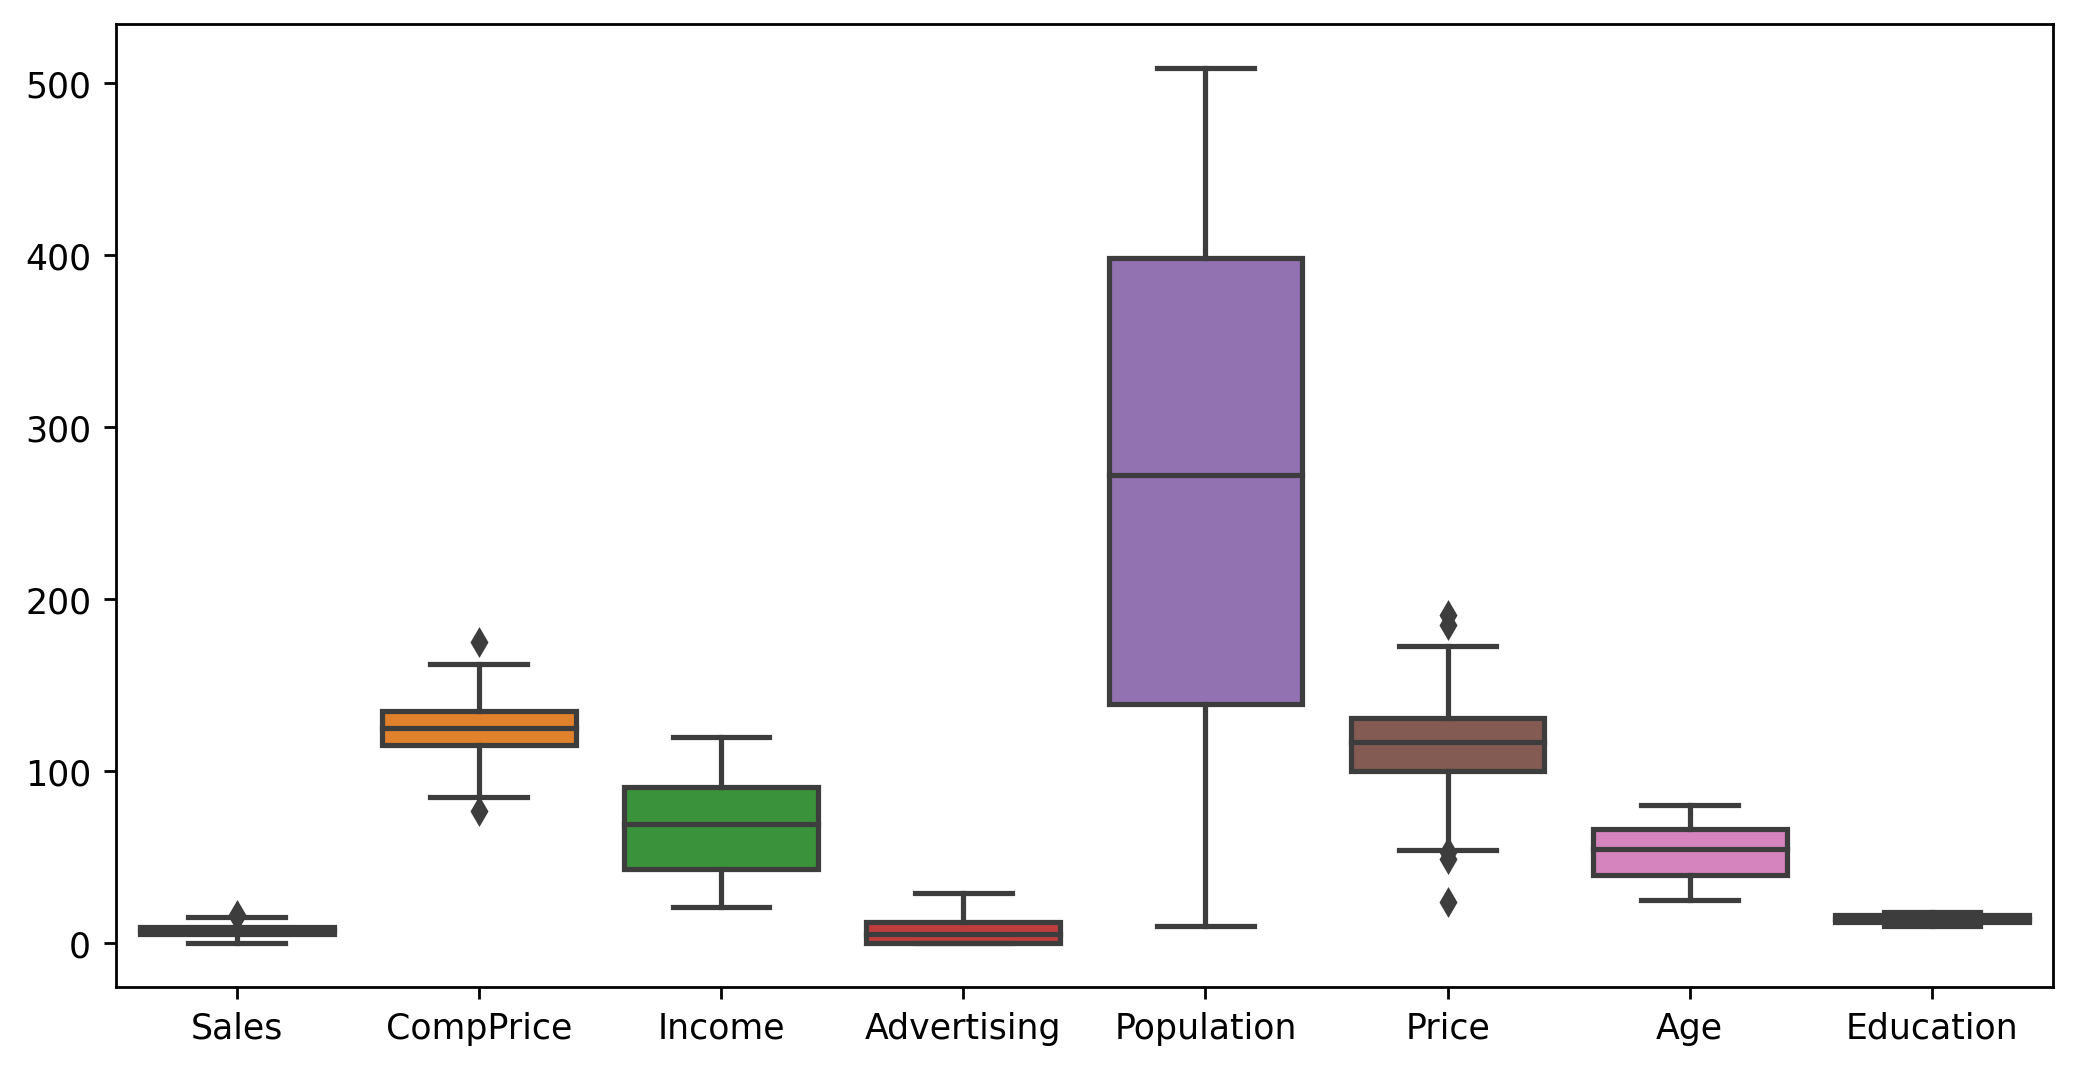

In [7]:
sns.boxplot(df)

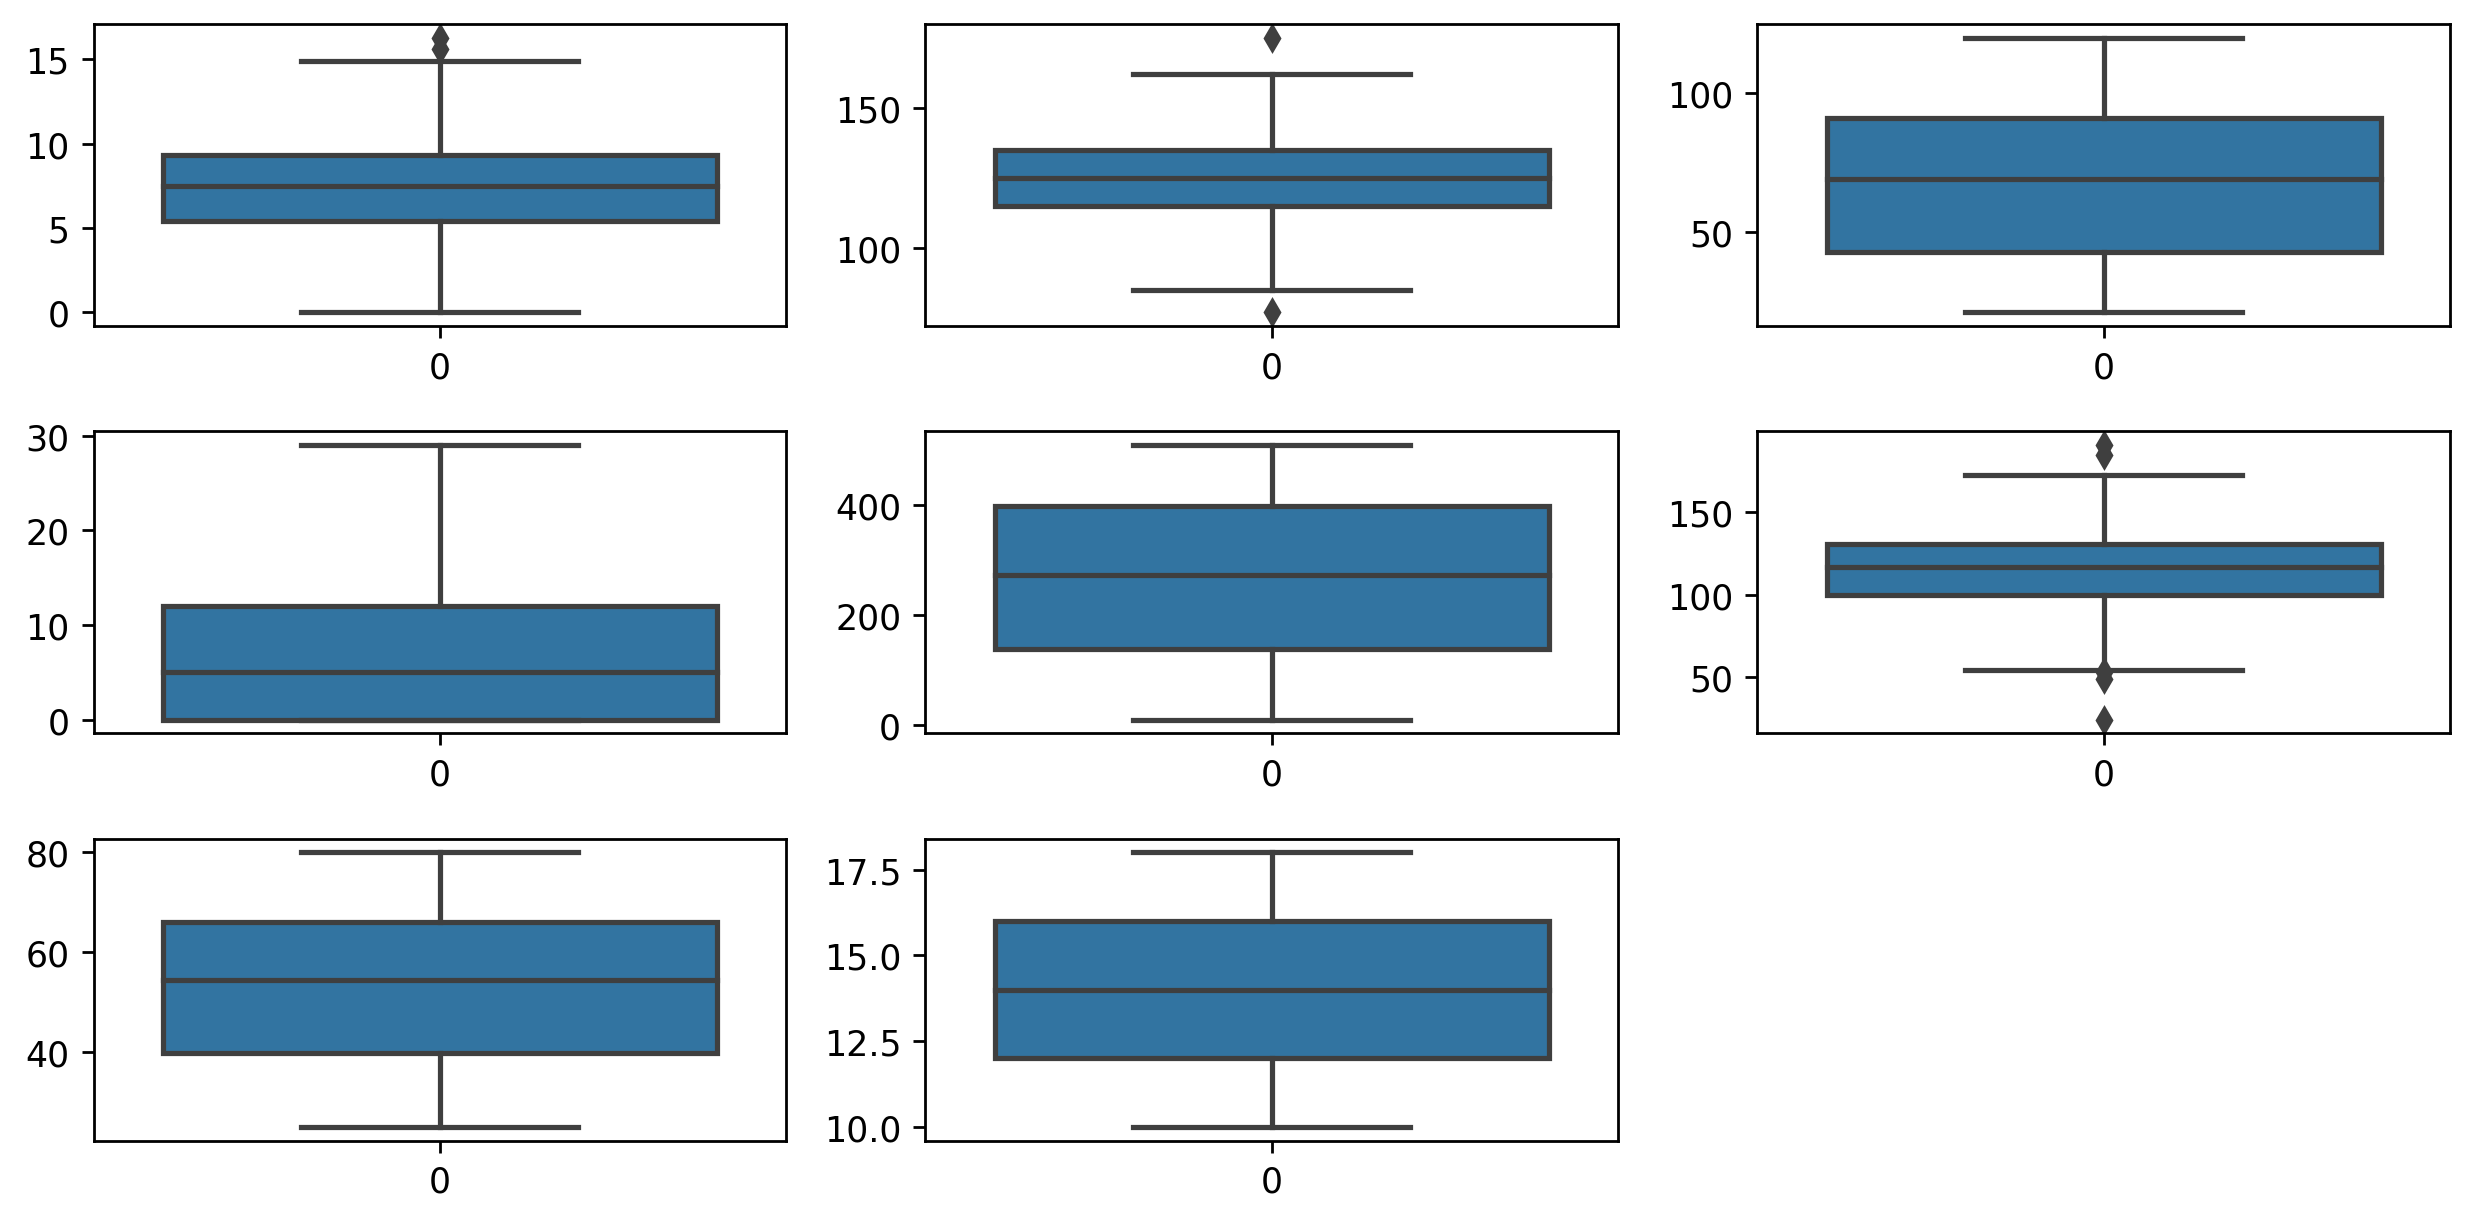

In [8]:
plt.subplot(3,3,1)
sns.boxplot(df['Sales'])

plt.subplot(3,3,2)
sns.boxplot(df['CompPrice'])

plt.subplot(3,3,3)
sns.boxplot(df['Income'])

plt.subplot(3,3,4)
sns.boxplot(df['Advertising'])

plt.subplot(3,3,5)
sns.boxplot(df['Population'])

plt.subplot(3,3,6)
sns.boxplot(df['Price'])

plt.subplot(3,3,7)
sns.boxplot(df['Age'])

plt.subplot(3,3,8)
sns.boxplot(df['Education'])

plt.tight_layout()

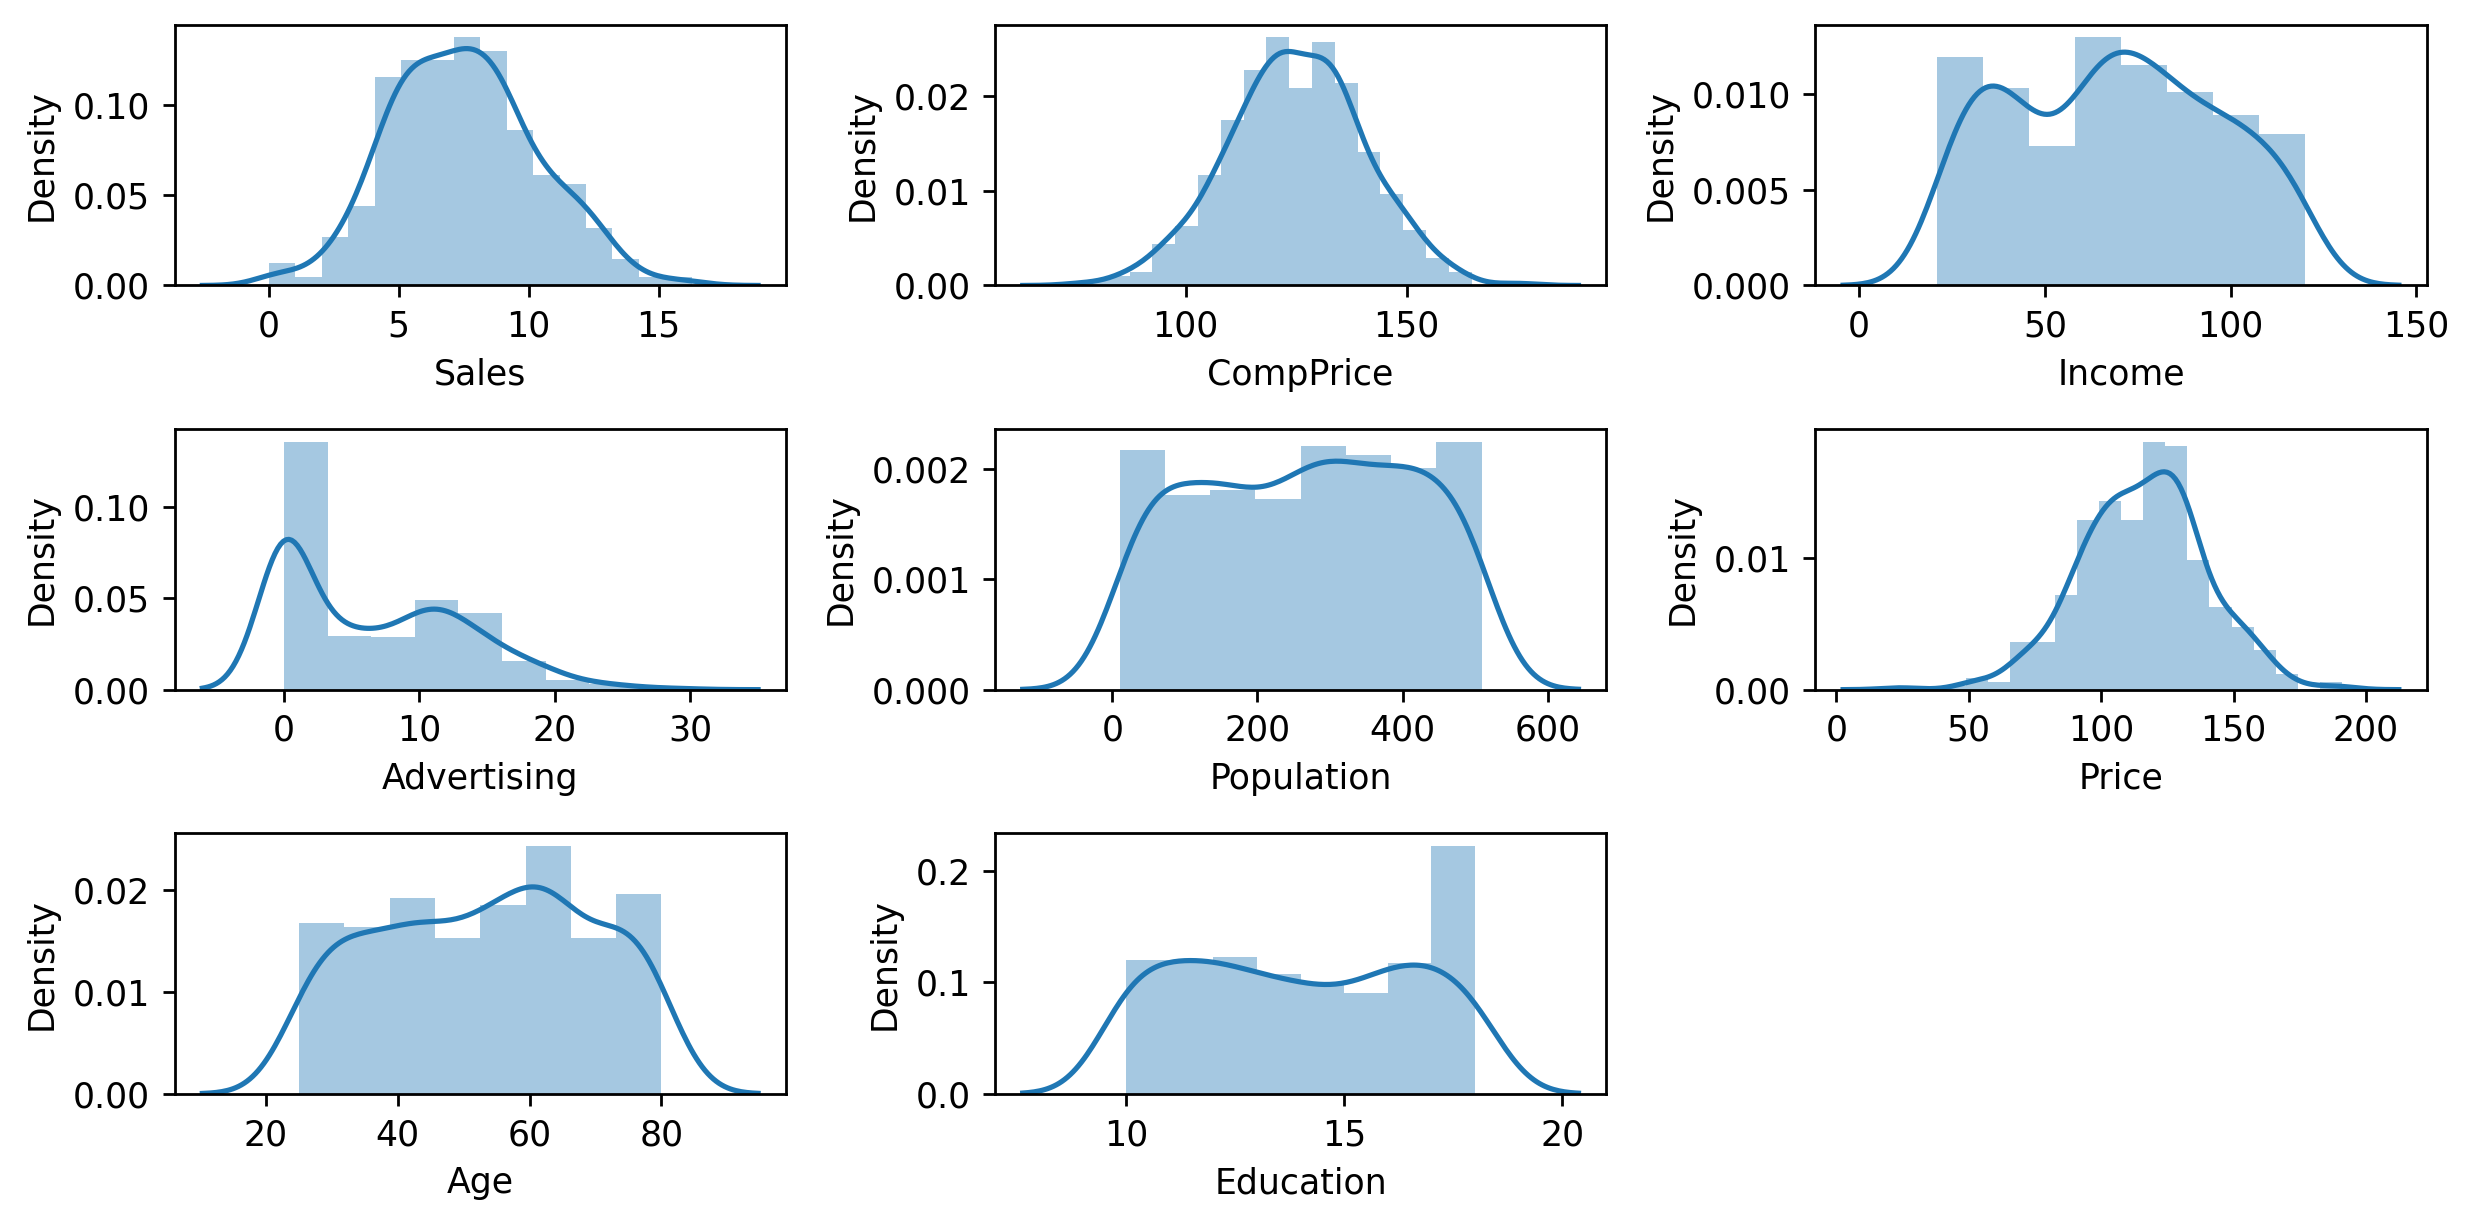

In [9]:
plt.subplot(3,3,1)
sns.distplot(df['Sales'])

plt.subplot(3,3,2)
sns.distplot(df['CompPrice'])

plt.subplot(3,3,3)
sns.distplot(df['Income'])

plt.subplot(3,3,4)
sns.distplot(df['Advertising'])

plt.subplot(3,3,5)
sns.distplot(df['Population'])

plt.subplot(3,3,6)
sns.distplot(df['Price'])

plt.subplot(3,3,7)
sns.distplot(df['Age'])

plt.subplot(3,3,8)
sns.distplot(df['Education'])

plt.tight_layout()

In [10]:
corr = df.corr()
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<Axes: >

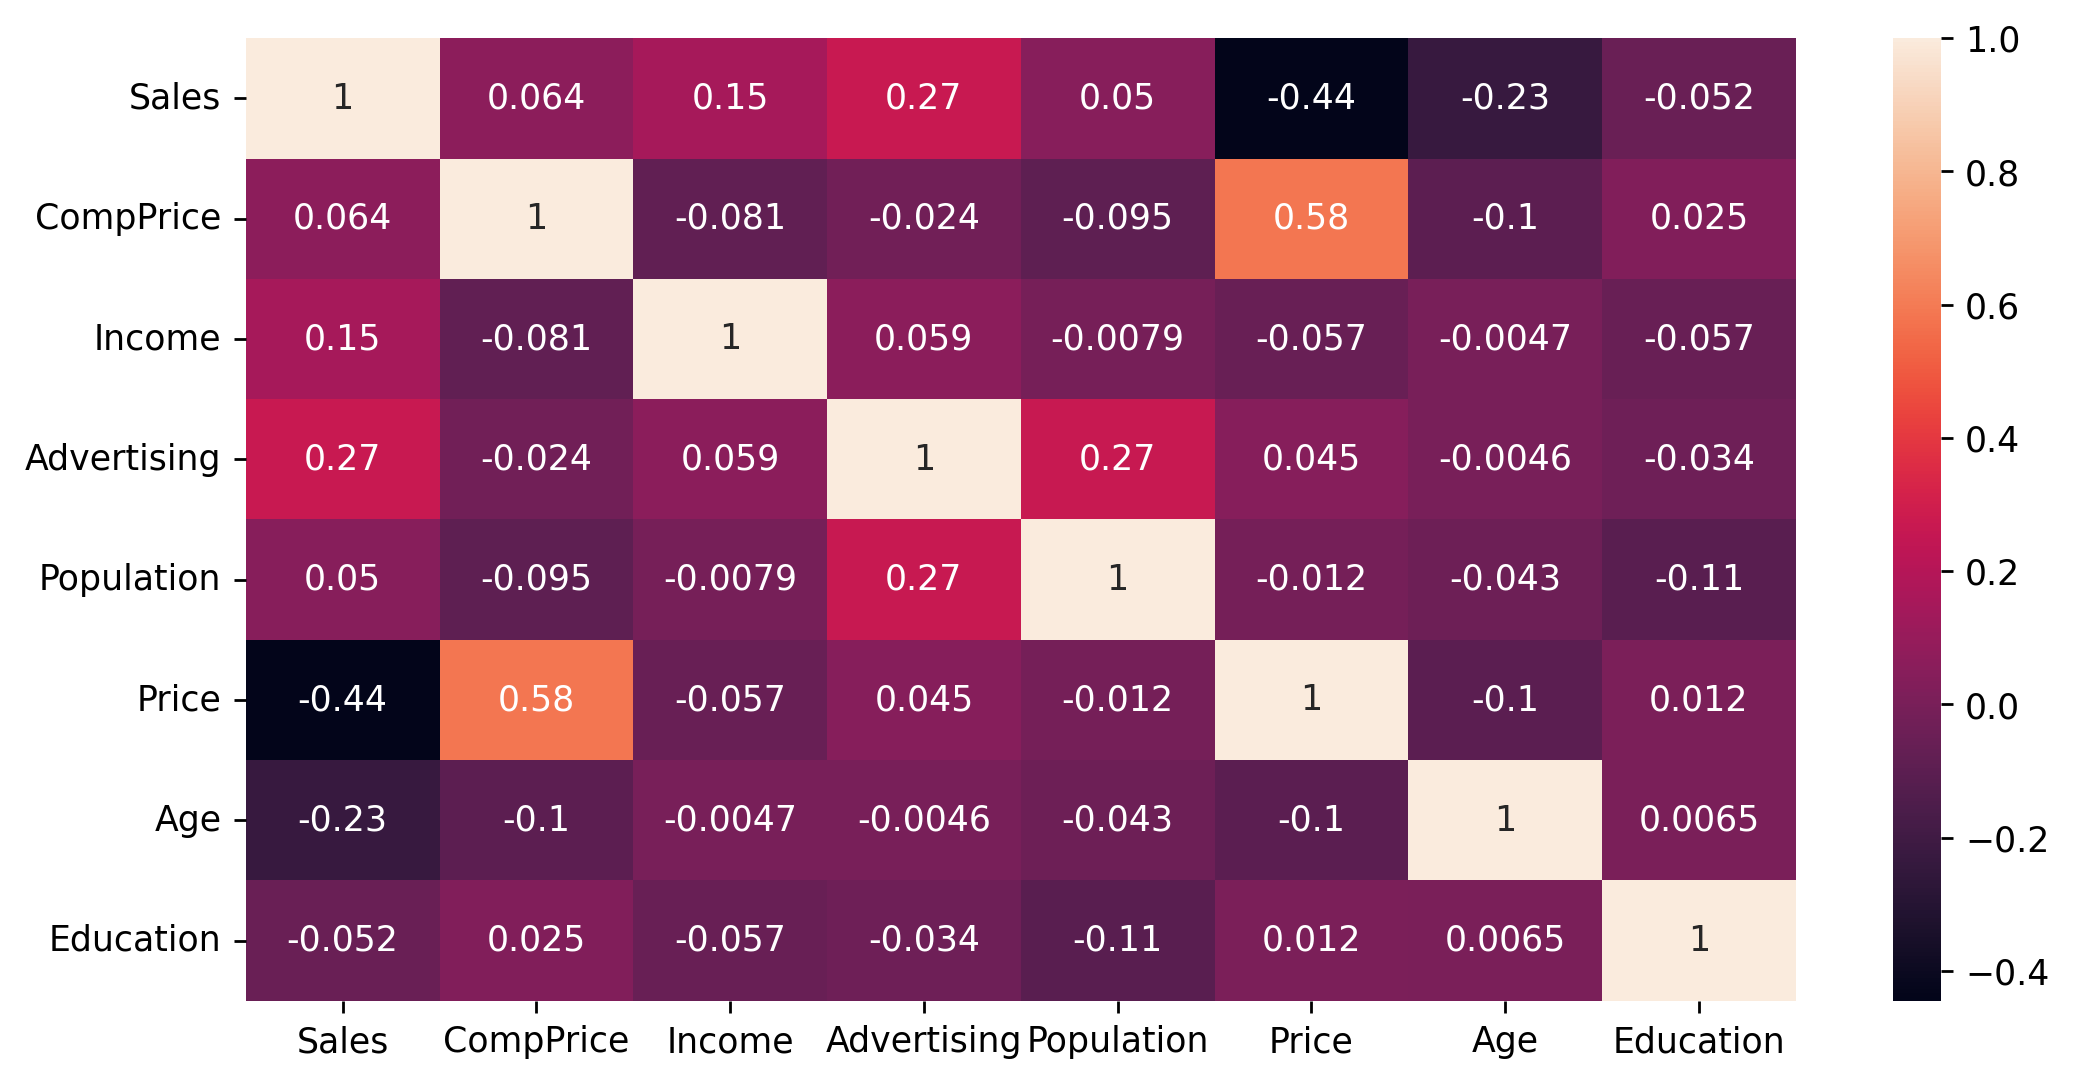

In [11]:
sns.heatmap(corr,annot=True)

In [12]:
df = pd.get_dummies(df,columns=['ShelveLoc','Urban','US'])

In [13]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [14]:
# Since the target variable is continious, we create a class of the value based on the mean <= 7.49 == "Small" and > 7.49 == "large"

df["sales"]="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [15]:
x = df.iloc[:,0:14]
y = df.iloc[:,14]

## Model Building

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, stratify = y)

In [17]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

## Model Accuracy

In [18]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       large       0.80      0.88      0.83        40
       small       0.86      0.78      0.82        40

    accuracy                           0.82        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.82      0.82        80



In [19]:
print(confusion_matrix(ytest,ypred))

[[35  5]
 [ 9 31]]


## Plotting the Decision Trees

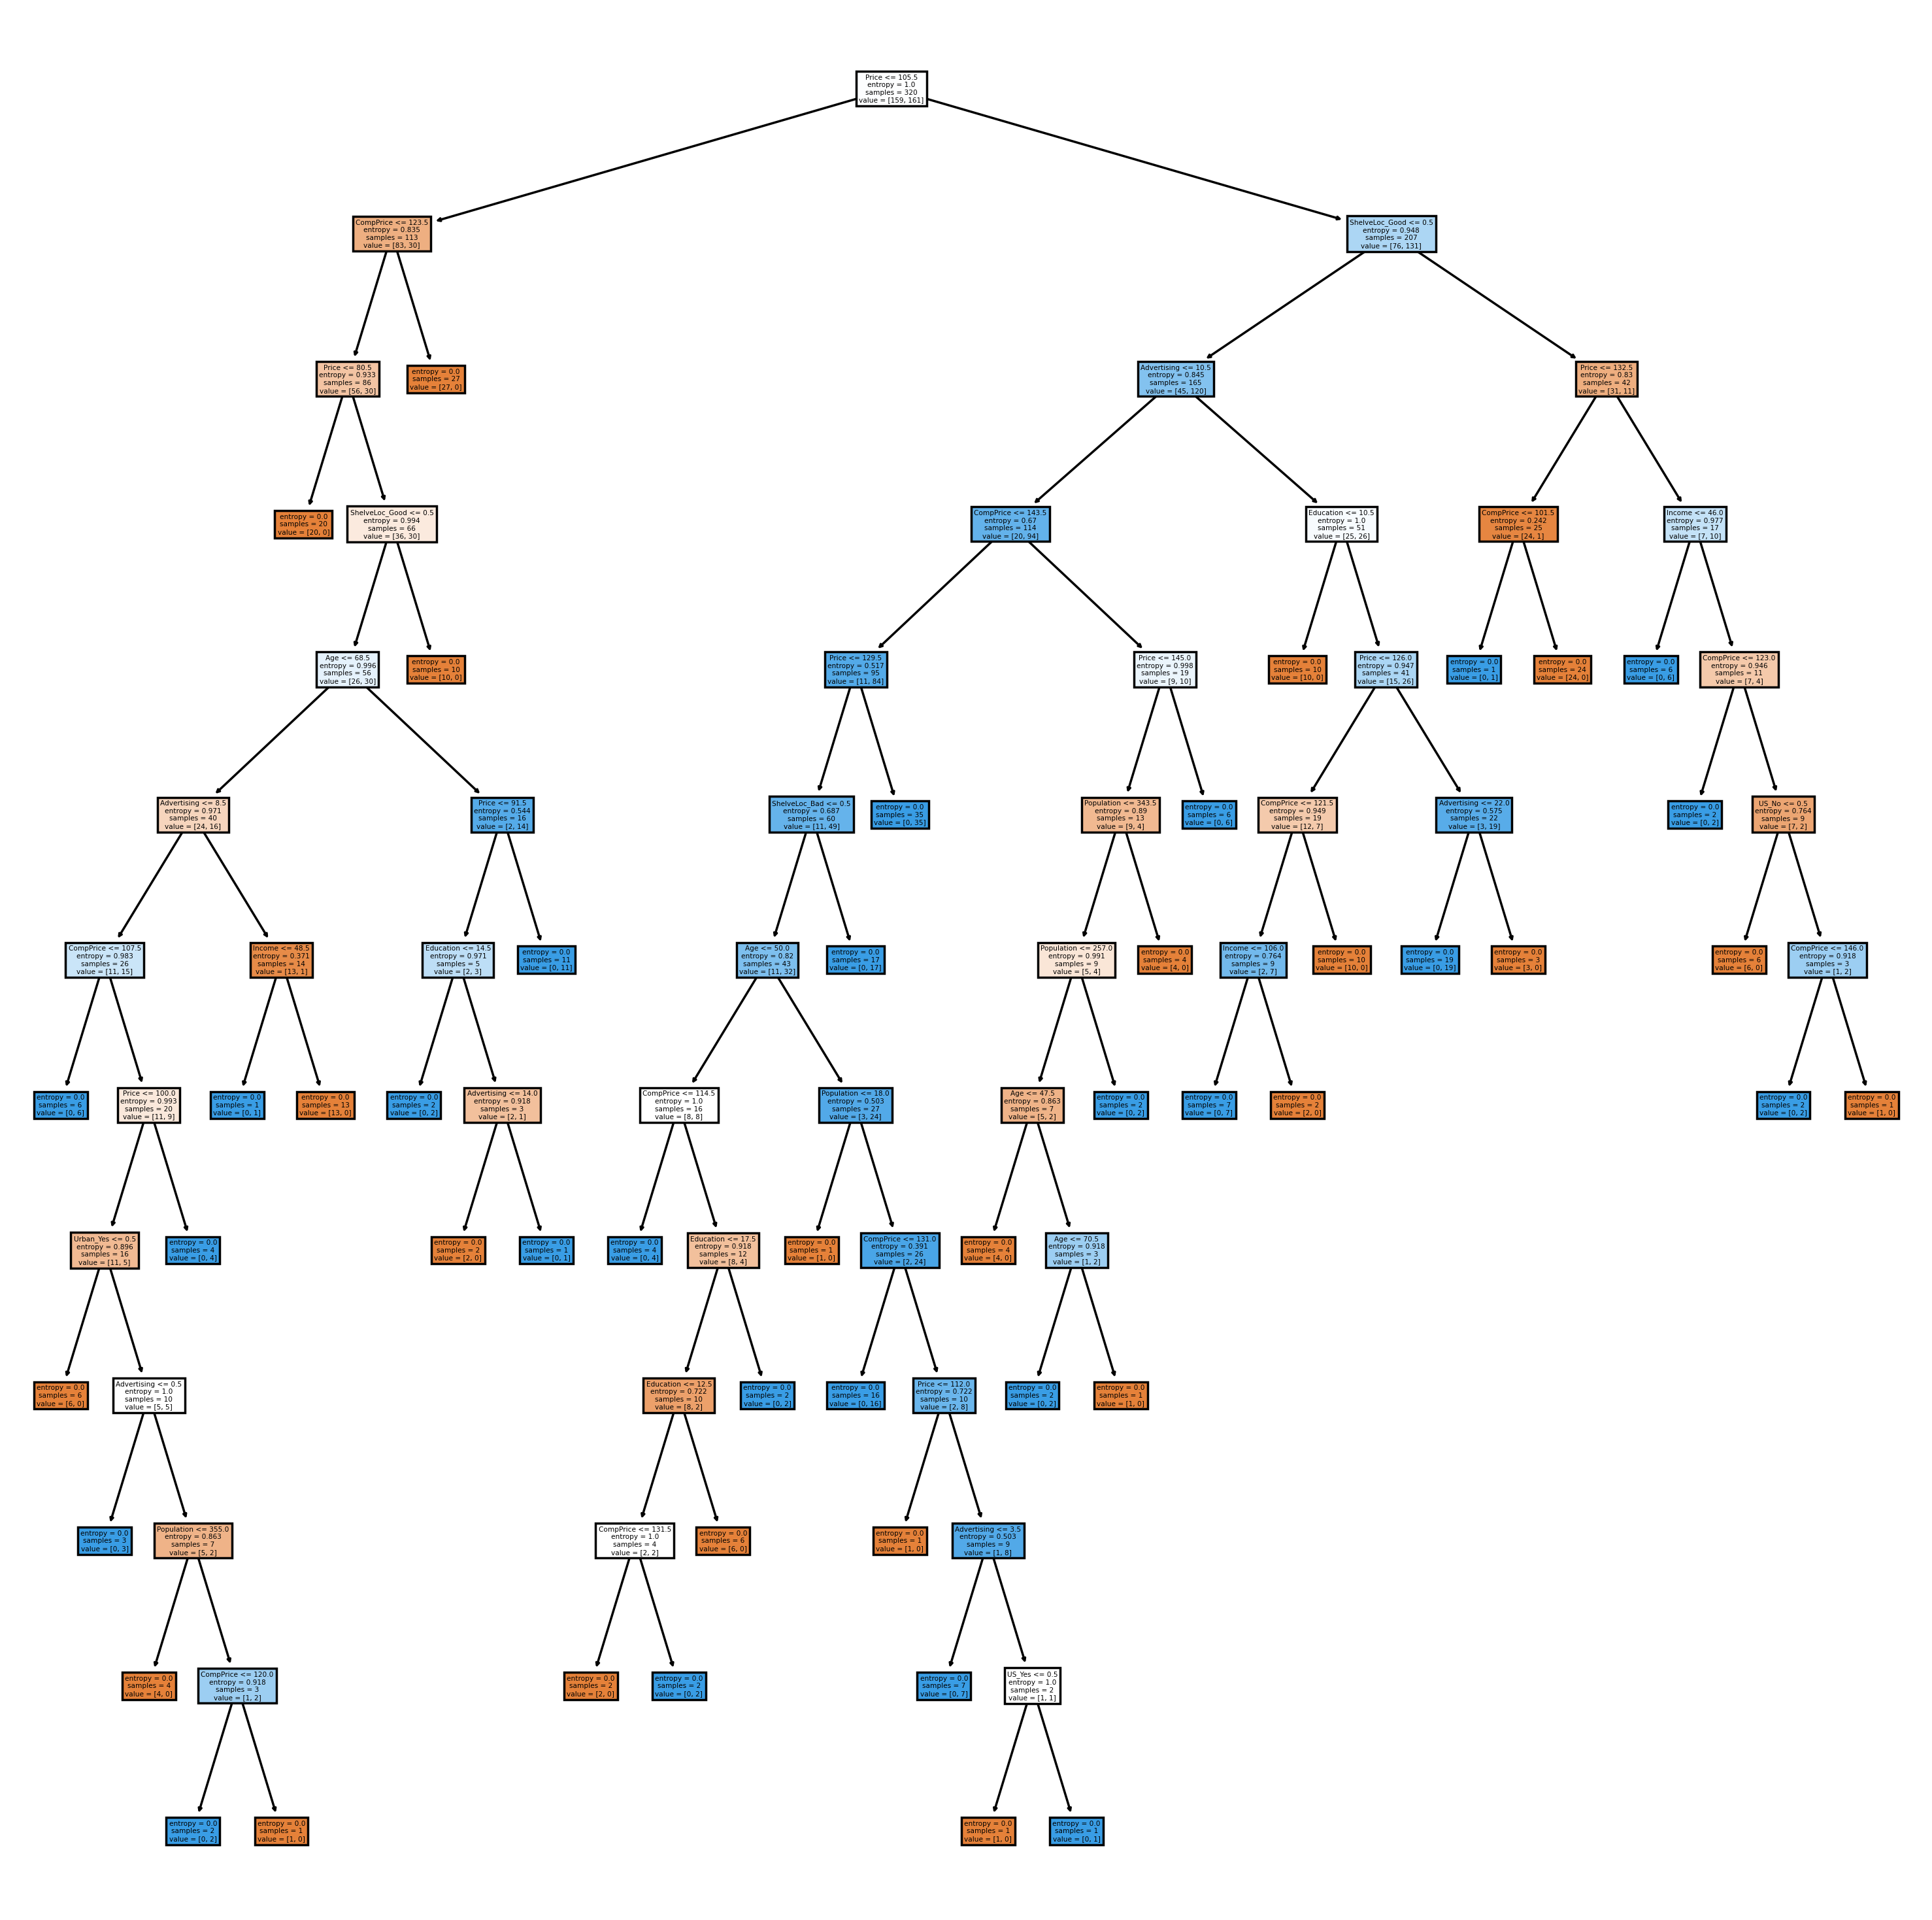

In [20]:
plt.figure(figsize=(15,15))
tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()